# VAE+LnZ estimation 

In [ ]:
from starccato_jax.data import load_data
import matplotlib.pyplot as plt
import os 

HERE = os.getcwd()
model_savedir = f"{HERE}/model_out" 

train_data, val_data = load_data()

plt.figure(figsize=(3,2.5))
for i in range(100):
    plt.plot(train_data[i], color='k', lw=0.3, alpha=0.2)
plt.savefig(f"{model_savedir}/training_data.png")


![](model_out/training_data.png)

In [ ]:
from starccato_jax.trainer import train_vae

train_vae(train_data, val_data, n_epochs=20, batch_size=32, latent_dim=12, save_dir=model_savedir)

| Loss | Reconstruction|
|---|---|
|![loss]| ![reconstructions] | 

[loss]: model_out/loss.png
[reconstructions]: model_out/reconstructions.png

/Users/avaj0001/Documents/projects/venvs/starccato_jax/lib/python3.11/site-packages/orbax/checkpoint/_src/serialization/type_handlers.py:1175: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


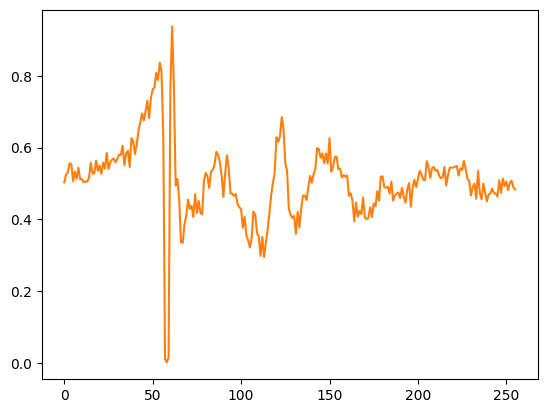

In [18]:
from starccato_jax.trainer import load_model
from starccato_jax.model import generate

generated_signal = generate(*load_model(model_savedir), rng_seed=0)[0]
plt.plot(generated_signal, color='tab:orange')